# Homework 1 Coding Assignment

## Inital Setup and checking

In [58]:
import numpy as np
from matplotlib import pyplot as plt
import math

In [59]:
NACAx = np.loadtxt('NACA0012_x.txt', dtype= 'float')         #Loading in of source locations
NACAy = np.loadtxt('NACA0012_y.txt', dtype = 'float')
NACAsigma = np.loadtxt('NACA0012_sigma.txt', dtype = 'float')

In [60]:
N = 51             #Creating mesh of 51 with dimensions of [-1, 2] X [-0.5, 0.5]                   
x_start, x_end = -1.0, 2.0            
y_start, y_end = -0.5, 0.5            
x = np.linspace(x_start, x_end, N)   
y = np.linspace(y_start, y_end, N)   
X, Y = np.meshgrid(x, y)  

In [61]:
#Creating function for freestream velocity
u_inf = 1.0      
def hor_freestream(u_inf, N, Y):
    u_freestream = u_inf * np.ones((N, N), dtype=float)
    v_freestream = np.zeros((N, N), dtype=float)
    psi_freestream = u_inf * Y
    return u_freestream, v_freestream,  psi_freestream

In [62]:
u_freestream, v_freestream, psi_freestream = hor_freestream(u_inf, N, Y)
u_total = u_freestream
v_total = v_freestream

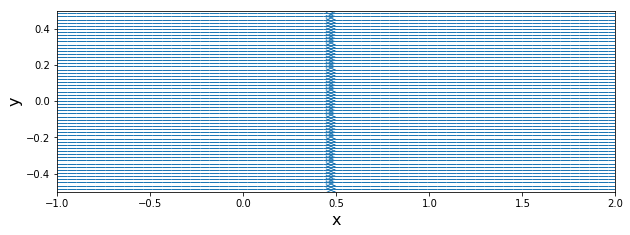

In [63]:
% matplotlib inline
width = 10.0
height = (y_end - y_start) / (x_end - x_start) * width
plt.figure(figsize=(width, height))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.streamplot(X, Y, u_total, v_total , density=2, linewidth=1, arrowsize=2, arrowstyle='->')

#Check of Freestream velocity

## Creating the airfoil in the freestream flow

In [64]:
def airfoil(x, y, sigma, X, Y): #Velocity and streamlines from source locations
    u = sigma / (2 * math.pi) * (X - x) / ((X - x)**2 + (Y - y)**2)
    v = sigma / (2 * math.pi) * (Y - y) / ((X - x)**2 + (Y - y)**2)
    psi = sigma / (2 * math.pi) * np.arctan2((Y - y),(X - x))
    return u, v, psi

In [65]:
u, v = u_freestream, v_freestream
psi = psi_freestream

for i in range(len(NACAsigma)):
    u2 , v2, psi2 = airfoil(NACAx[i], NACAy[i], NACAsigma[i], X, Y)
    u = u2 + u
    v = v2 + v
    psi = psi2 + psi
    

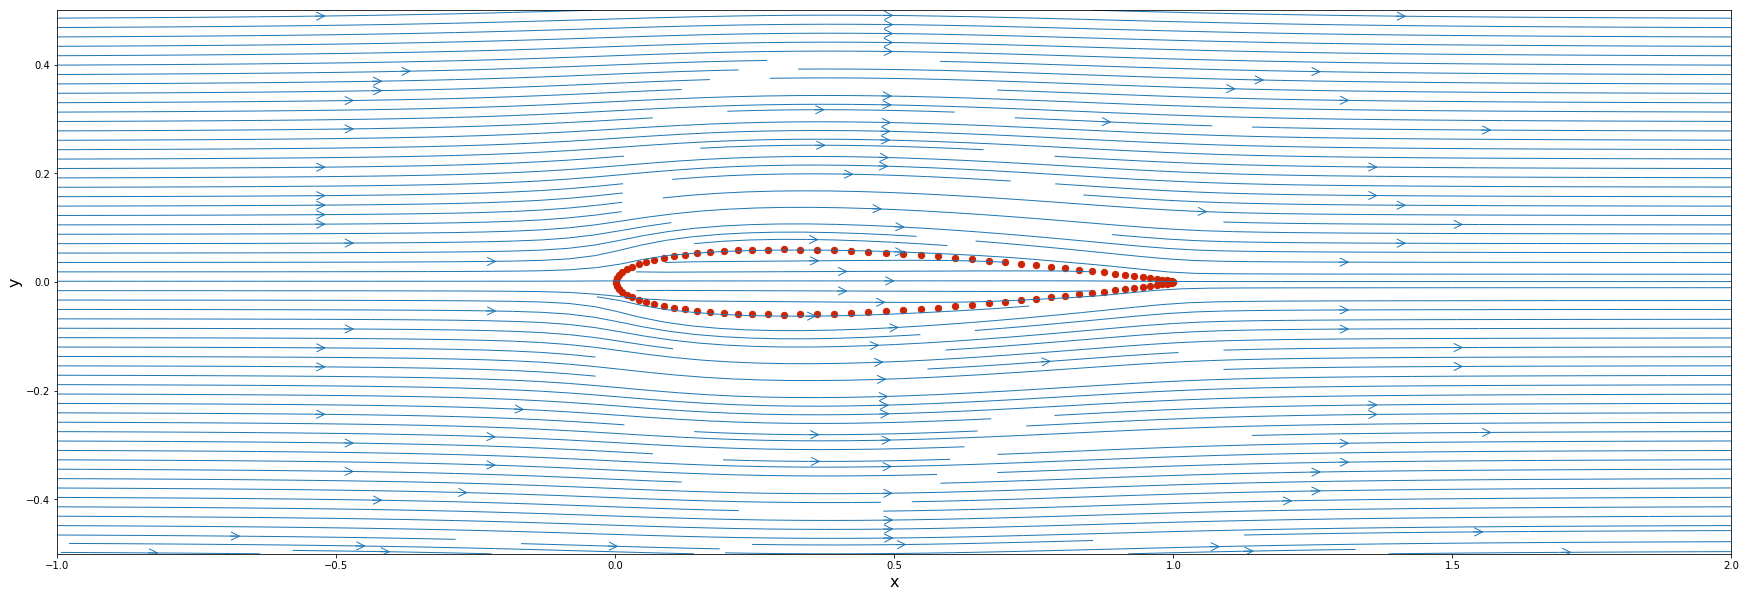

In [66]:
width = 30.0
height = (y_end - y_start) / (x_end - x_start) * width
plt.figure(figsize=(width, height))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.streamplot(X, Y, u, v , density=2, linewidth=1, arrowsize=2, arrowstyle='->')
plt.scatter(NACAx, NACAy, color='#CD2305', s=40, marker='o')

## Solving for Pressure Coefficient

In [67]:
cp = 1.0 - (u**2+v**2)/u_inf**2

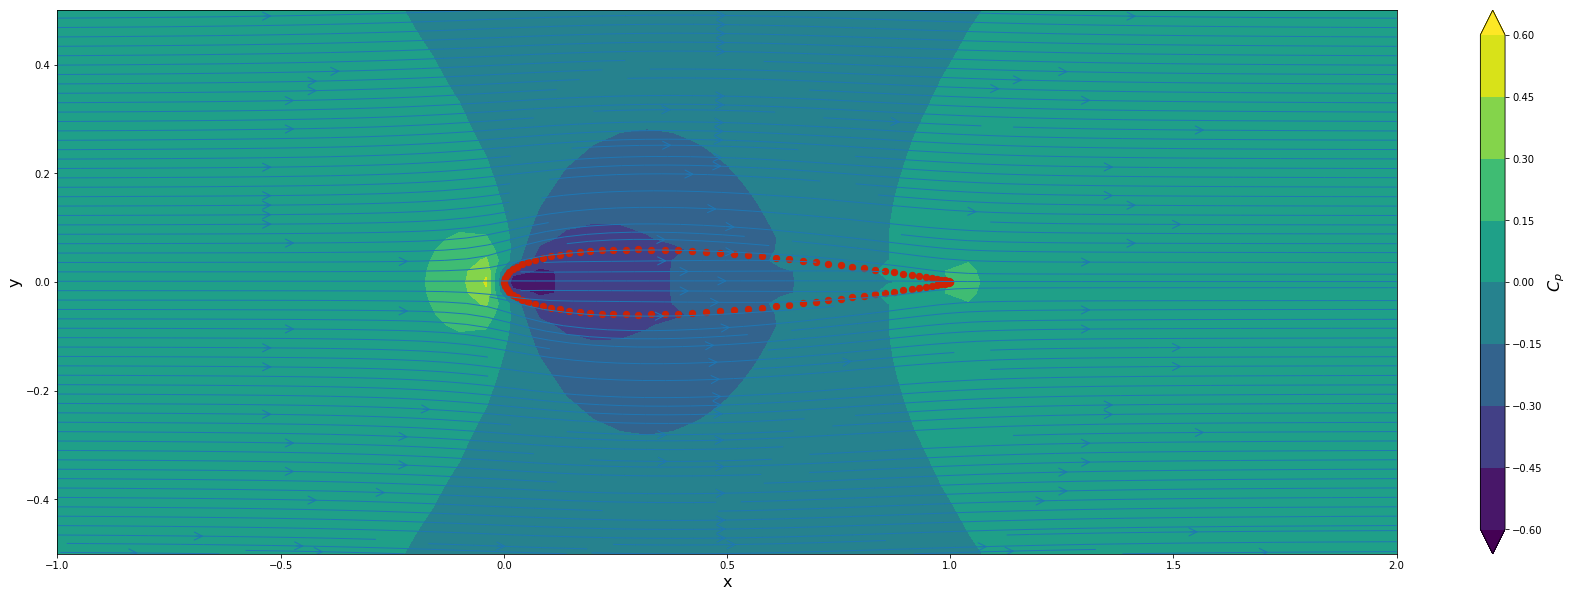

In [68]:
width = 30.0
height = (y_end - y_start) / (x_end - x_start) * width
plt.figure(figsize=(width, height))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.streamplot(X, Y, u, v , density=2, linewidth=1, arrowsize=2, arrowstyle='->')
contf = plt.contourf(X, Y, cp, extend='both')
cbar = plt.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
plt.scatter(NACAx, NACAy, color='#CD2305', s=40, marker='o')

# Stagnation point, Max CP

In [69]:
np.max(cp)

0.47144366133162352

In [70]:
np.where(cp == np.max(cp))

(array([25]), array([16]))

In [71]:
x[16], y[25]

(-0.040000000000000036, 0.0)

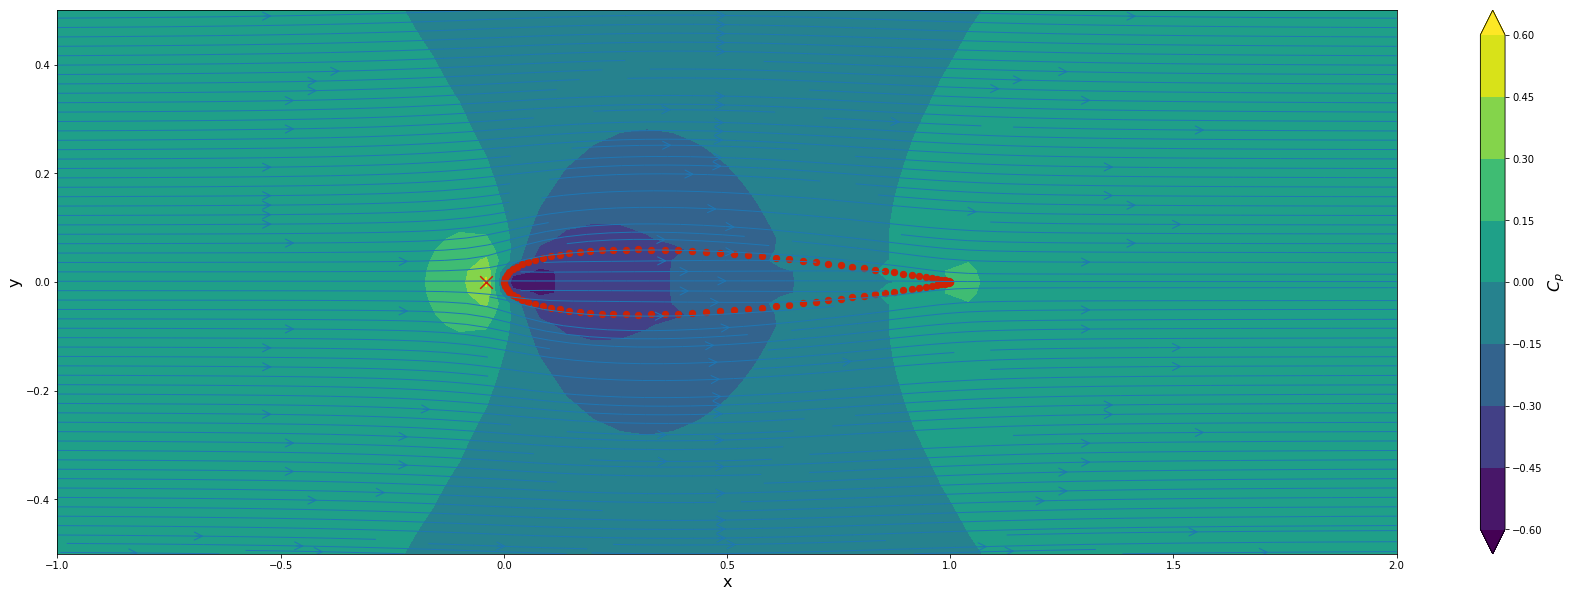

In [73]:
width = 30.0
height = (y_end - y_start) / (x_end - x_start) * width
plt.figure(figsize=(width, height))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.streamplot(X, Y, u, v , density=2, linewidth=1, arrowsize=2, arrowstyle='->')
contf = plt.contourf(X, Y, cp, extend='both')
cbar = plt.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
plt.scatter(NACAx, NACAy, color='#CD2305', s=40, marker='o')
plt.scatter(x[16], y[25], color='#CD2305', s=160, marker='x')

## Think Section

The streamlines look as expected where they move around the airfoila and then rejoin after the airfoil eventually returning to a unform flow profile. Similarly if we look inside the airfoil the flow lines are parallel which is a good sign that this is a symmetric airfoil at 0 angle of attack.

The pressure distribution tells me that there is no lift generated by this airfoil. Since the system is at 0 angle of attack the flow show move around the airfoil equally and then rejoin at the trailing edge of the airfoil.

